In [79]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
masterdir = '/Users/law232/Desktop/Observations 2016-17/2016-10-18/'
workingdir = masterdir+'working/'

In [80]:
from astropy.table import Table
starDataFile = masterdir+'xxCyg_ComparisonStars.txt'
starData = Table.read(starDataFile, format='ascii', header_start=8)
# Print the header information for the table.
print(starData.keys())

['StarID', 'RA', 'Dec', 'B_simbad', 'V_simbad', 'Sloan_g', 'gerr', 'Sloan_r', 'r_err', 'Sloan_i', 'i_err']


In [81]:
starData.sort('Sloan_i')
starData[0:10]

StarID,RA,Dec,B_simbad,V_simbad,Sloan_g,gerr,Sloan_r,r_err,Sloan_i,i_err
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HD 190961,301.0995074583334,58.83460347228579,9.04,8.88,8.91,-0.0,8.879,-0.0,9.026,-0.0
BD+58 2035,300.6276933333333,58.88632027784984,11.25,10.25,10.985,0.511,9.873,-0.0,9.547,-0.0
BD+58 2037,300.7029583333334,59.009939444859825,11.34,10.24,11.039,0.419,9.936,-0.0,9.627,-0.0
BD+58 2043,300.95501,59.04530499988131,11.28,10.23,10.984,0.404,9.932,-0.0,9.659,-0.0
TYC 3948-2542-1,300.89915333333335,58.922608333163794,11.14,10.58,10.983,0.429,10.406,0.024,10.307,0.043
BD+58 2048,301.21176249999996,58.921469999949146,10.64,10.27,10.803,0.491,10.319,0.041,10.385,0.082
TYC 3948-2105-1,300.8503416666667,59.00529166645474,12.48,11.07,11.757,-0.0,10.886,0.005,10.508,0.008
TYC 3948-1985-1,300.5774366666667,58.989697222179835,11.31,10.96,11.23,0.442,10.66,0.021,10.574,0.05
TYC 3948-2018-1,301.0171500000001,59.00512777752346,13.44,11.63,12.517,-0.0,11.319,0.038,10.767,0.012


In [82]:
starData[10:20]

StarID,RA,Dec,B_simbad,V_simbad,Sloan_g,gerr,Sloan_r,r_err,Sloan_i,i_err
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
TYC 3948-2431-1,300.6528208333333,58.891477777693005,12.83,12.16,12.059,-0.0,11.487,0.008,11.281,0.039
TYC 3948-2230-1,301.0225458333333,58.914324999915216,12.31,11.46,11.954,-0.0,11.511,0.016,11.343,0.034
XX Cyg,300.8151983749999,58.95458783308665,11.99,11.86,11.929,0.426,11.447,0.136,11.433,0.194
TYC 3948-2166-1,300.74947083333325,58.87208611117469,12.02,11.55,11.944,-0.0,11.576,0.016,11.444,0.028
TYC 3948-1768-1,301.0259916666667,58.890497222476526,13.2,12.31,12.349,-0.0,11.823,0.011,11.618,0.053
TYC 3948-1514-1,300.43560833333333,58.92014444457159,13.09,12.99,12.415,-0.0,12.007,0.019,11.864,0.059
TYC 3948-2152-1,300.45843749999995,58.87550277762942,12.87,12.22,12.386,-0.0,12.157,0.039,12.084,0.054
GSC 03948-02049,301.068425,58.89676944414774,13.1,12.2,12.283,-0.0,12.153,0.034,12.145,0.069
GSC 03948-02563,300.8280875,58.96506111145021,14.3,13.6,13.652,-0.0,13.183,0.006,13.003,0.014


In [118]:
print('The Sloan r magnitude of "{0}" is {1}.'
      .format(starData[2]['StarID'], starData[2]['Sloan_i']))

The Sloan r magnitude of "BD+58  2037" is 9.627.


In [119]:
al_files = glob.glob(workingdir+'al_cal_*.fits')
al_files = sorted(al_files) # Not necessary, but orders filenames.
print('There are {0} aligned, calibrated image files: '.format(len(al_files)))
al_files[0:5]

There are 310 aligned, calibrated image files: 


['/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/al_cal_CCD_Image_0042.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/al_cal_CCD_Image_0043.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/al_cal_CCD_Image_0044.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/al_cal_CCD_Image_0045.fits',
 '/Users/law232/Desktop/Observations 2016-17/2016-10-18/working/al_cal_CCD_Image_0046.fits']

In [120]:
wcsfile = fits.open(workingdir+'WCS_cal_CCD_Image_0420.fits')
wcs_head = wcsfile[0].header
wcsfile.close()

In [121]:
from astropy.wcs import WCS
wcs_info = WCS(wcs_head)

In [122]:
al_image = fits.open(al_files[10])
al_image_data = al_image[0].data
al_image_head = al_image[0].header
al_image.close()

/Users/Shared/conda/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


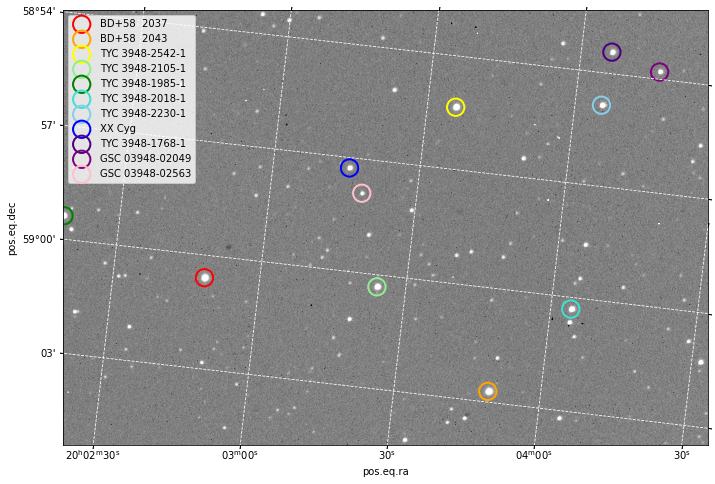

In [159]:
from matplotlib.colors import LogNorm
plt.figure(figsize = (14, 8))
norm = LogNorm()
vmin = np.percentile(al_image_data.flatten(),0.1)
vmax = np.percentile(al_image_data.flatten(),99.9)

ax = plt.subplot(projection = wcs_info)
ax.imshow(al_image_data, cmap='Greys_r', norm=norm, vmin=vmin, vmax=vmax)

ax.grid(color='white', ls='dashed',)
ax.invert_xaxis()

# Draw a circle around some stars, just to identify them.
calstarData = starData[2] # 3rd star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='red', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[3] # 4th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='orange', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[4] # 5th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='yellow', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[6] # 7th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='lightgreen', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[7] # 8th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='green', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[8] # 9th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='turquoise', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[11] # 12th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='skyblue', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[12] # 13th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='blue', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[14] # 15th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='indigo', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[17] # 18th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='purple', facecolor='none',label=calstarData['StarID'],lw=2)
calstarData = starData[18] # 19th star in table
ax.scatter(calstarData['RA'], calstarData['Dec'], transform=ax.get_transform('fk5'), s=300, edgecolor='pink', facecolor='none',label=calstarData['StarID'],lw=2)

ax.legend()

plt.savefig('CalibrationStars.png')

In [124]:
targetData = starData[[2,3,4,8,11,12]]

In [125]:
import photutils
from astropy import units as u
from astropy.coordinates import SkyCoord

In [126]:
targetCoords = SkyCoord(targetData['RA'], targetData['Dec'], unit = 'deg')
targetCoords[0]

<SkyCoord (ICRS): (ra, dec) in deg
    (300.70295833, 59.00993944)>

In [127]:
targetApRad = 12.0*u.arcsec # Radius of the stellar aperture.
skyAnR1 = 15.0*u.arcsec # Inner radius of the sky annulus.
skyAnR2 = 25.0*u.arcsec # Outer radius of the sky annulus.
targetApertures = photutils.SkyCircularAperture(targetCoords, r = targetApRad)
skyApertures = photutils.SkyCircularAnnulus(targetCoords, r_in=skyAnR1,r_out=skyAnR2)
print(targetApertures[0:2])
print(skyApertures)


Aperture: SkyCircularAperture
positions: <SkyCoord (ICRS): (ra, dec) in deg
    [(300.70295833, 59.00993944), (300.95501   , 59.045305  )]>
r: 12.0 arcsec
Aperture: SkyCircularAnnulus
positions: <SkyCoord (ICRS): (ra, dec) in deg
    [(300.70295833, 59.00993944), (300.95501   , 59.045305  ),
     (300.89915333, 58.92260833), (301.01715   , 59.00512778),
     (301.02254583, 58.914325  ), (300.81519837, 58.95458783)]>
r_in: 15.0 arcsec
r_out: 25.0 arcsec


In [128]:
targetApertures = targetApertures.to_pixel(wcs_info)
skyApertures = skyApertures.to_pixel(wcs_info)
print(targetApertures[0:2])
print('Area of star apertures in pixels = {}'.format(targetApertures.area))
print('Area of sky apertures in pixels = {}'.format(skyApertures.area))

Aperture: CircularAperture
positions: [[851.59986072, 282.25524064],
            [372.04549178,  89.88220727]]
r: 12.801970934667903
Area of star apertures in pixels = 514.8770645390894
Area of sky apertures in pixels = 1430.214068164137


/Users/Shared/conda/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


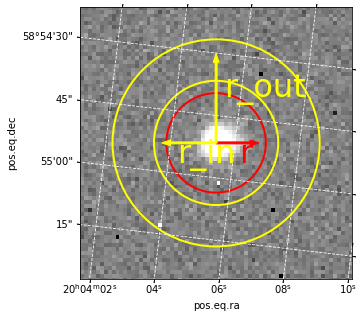

In [169]:
plt.figure(figsize=(5,5))

norm = LogNorm()
vmin = np.percentile(al_image_data.flatten(),0.1)
vmax = np.percentile(al_image_data.flatten(),99.9)

ax = plt.subplot(projection=wcs_info)

ax.imshow(al_image_data, cmap='Greys_r', norm=norm, vmin=vmin, vmax=vmax)
ax.grid(color='white', ls='dashed', )
ax.invert_xaxis()

nstr = 4 # just to specify which star to plot

# Define the x, y positions for cleaner code
xpos = targetApertures[nstr].positions[0]
ypos = targetApertures[nstr].positions[1]

# Draw the apertures on the plot.
targetApertures[nstr].plot(color = 'red', lw=2)
skyApertures[nstr].plot(color = 'yellow', lw=2)

# Annotate the plot with arrows and text.
ax.arrow(xpos, ypos, -11,0,color='red' ,width=0.5,length_includes_head=True,zorder=20)
ax.arrow(xpos, ypos, 14,0,color='yellow' ,width=0.5,length_includes_head=True,zorder=20)
ax.arrow(xpos, ypos, 0,23,color='yellow' ,width=0.5,length_includes_head=True,zorder=20)
ax.text(xpos-6,ypos-5,'r',color='red',fontsize=32)
ax.text(xpos+10,ypos-5,'r_in',color='yellow',fontsize=32)
ax.text(xpos-2,ypos+12,'r_out',color='yellow',fontsize=32)

# Zoom in near plotted star.
npix = 35 # Sets 1/2 of zoom box size in pixels.
ax.set_xlim(xpos+npix, xpos-npix)
ax.set_ylim(ypos-npix, ypos+npix)
# plt.savefig('test.pdf') # Uncomment to save image as pdf.

plt.savefig('XXCygni_R.png')
#plt.savefig('BD58_2037_R.png')

In [130]:
bothApertures = [targetApertures, skyApertures]
phot_table = photutils.aperture_photometry(al_image_data, bothApertures, wcs=wcs_info)
phot_table[0:10]

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1
,pix,pix,,
int64,float64,float64,float64,float64
1,851.5998607182871,282.2552406378893,619559.557585289,309155.9584349835
2,372.04549178080737,89.88220727007528,599042.6106568943,313164.13832077524
3,426.3733777618758,570.7830845125798,382338.10026131663,307524.957856886
4,231.59439657020673,229.1896689703981,283934.9120558162,346914.72600826353
5,179.6422943129604,574.1936568303241,215640.3515777374,309537.66453253536
6,606.033694179383,468.03604916989065,187987.9357512504,307176.36563292076


In [131]:
skyPerPixel = phot_table['aperture_sum_1'] / skyApertures.area
skyPerTargetAperture = skyPerPixel * targetApertures.area
# Add a new column to the table for the sky-subtracted target counts.
phot_table['Target_Counts'] = phot_table['aperture_sum_0'] - skyPerTargetAperture
phot_table[0:10]

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,Target_Counts
,pix,pix,,,
int64,float64,float64,float64,float64,float64
1,851.5998607182871,282.2552406378893,619559.557585289,309155.9584349835,508263.41254869493
2,372.04549178080737,89.88220727007528,599042.6106568943,313164.13832077524,486303.5208614152
3,426.3733777618758,570.7830845125798,382338.10026131663,307524.957856886,271629.1154328377
4,231.59439657020673,229.1896689703981,283934.9120558162,346914.72600826353,159045.61069284132
5,179.6422943129604,574.1936568303241,215640.3515777374,309537.66453253536,104206.79234602465
6,606.033694179383,468.03604916989065,187987.9357512504,307176.36563292076,77404.4441233989


In [132]:
expTime = float(al_image_head['EXPTIME'])
print('Exposure time = {} seconds.'.format(expTime))
flux_instrumental = phot_table['Target_Counts'] / expTime

Exposure time = 30.0 seconds.


In [133]:
 mag_instrumental = -2.5 * np.log10(flux_instrumental)
# Add a new column to the table for the Sloan r magnitude.
phot_table['rMag_Inst'] = mag_instrumental
phot_table[0:10]

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,Target_Counts,rMag_Inst
,pix,pix,,,,
int64,float64,float64,float64,float64,float64,float64
1,851.5998607182871,282.2552406378893,619559.557585289,309155.9584349835,508263.41254869493,-10.572418983315819
2,372.04549178080737,89.88220727007528,599042.6106568943,313164.13832077524,486303.5208614152,-10.52446539793328
3,426.3733777618758,570.7830845125798,382338.10026131663,307524.957856886,271629.1154328377,-9.892137661556648
4,231.59439657020673,229.1896689703981,283934.9120558162,346914.72600826353,159045.61069284132,-9.31100108330439
5,179.6422943129604,574.1936568303241,215640.3515777374,309537.66453253536,104206.79234602465,-8.851936932736695
6,606.033694179383,468.03604916989065,187987.9357512504,307176.36563292076,77404.4441233989,-8.529111603501793


In [134]:
obsDate = [] # To hold the time of each observation.
rMag_xxCyg_inst = [] # To hold the magnitudes of XX Cyg.
rMag_cals_inst = [] # To old mags of calibrators.

STDEV = []
FLUX_xxcyg = []
FLUX_cals = []

for i, x in enumerate(al_files[:]):
    
# Open file, extract image data and header.
    al_image = fits.open(x)
    al_image_data = al_image[0].data
    al_image_head = al_image[0].header
    al_image.close()
    
    al_data = al_image_data.flatten()
    STDEV.append(np.std(al_data))
    
    # Extract the date/time of observation.
    obsDate.append(float(al_image_head['JD-HELIO']))
    
    # Perform aperture photometry (following steps above).
    phot_table = photutils.aperture_photometry(al_image_data, bothApertures, wcs=wcs_info)
    
    skyPerPixel = phot_table['aperture_sum_1'] / skyApertures.area
    skyPerTargetAp = skyPerPixel * targetApertures.area
    
    targetCounts = phot_table['aperture_sum_0'] - skyPerTargetAp
    expTime = float(al_image_head['EXPTIME'])
    
    
    
    phot_table['rMag_Inst'] = flux_instrumental
    # Save the magnitude data to our lists.
    ixxc = np.where(targetData['StarID']=='XX Cyg')[0]
    ical = np.where(targetData['StarID']!='XX Cyg')[0]
    FLUX_xxcyg.append(phot_table['rMag_Inst'][ixxc]) #float was removed from before phot_table
    FLUX_cals.append(phot_table['rMag_Inst'][ical])
    
    
    
    flux_instrumental = targetCounts / expTime
    mag_instrumental = -2.5 * np.log10(flux_instrumental)
    phot_table['rMag_Inst'] = mag_instrumental
    
    # Save the magnitude data to our lists.
    ixxc = np.where(targetData['StarID']=='XX Cyg')[0]
    ical = np.where(targetData['StarID']!='XX Cyg')[0]
    rMag_xxCyg_inst.append(phot_table['rMag_Inst'][ixxc]) #float was removed from before phot_table
    rMag_cals_inst.append(phot_table['rMag_Inst'][ical])
    
    
    
    # You might want to print out some progress information,
    # in case you need to identify which images cause problems.
    #print(i)
    
obsDate = np.array(obsDate)
#rMag_xxCyg_inst = np.array(rMag_xxCyg_inst)
print(rMag_xxCyg_inst)
rMag_cals_inst = np.array(rMag_cals_inst)
print(rMag_cals_inst)
#print(obsDate)

/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33354/763496707.py:44: RuntimeWarning: divide by zero encountered in log10
  mag_instrumental = -2.5 * np.log10(flux_instrumental)
/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33354/763496707.py:44: RuntimeWarning: invalid value encountered in log10
  mag_instrumental = -2.5 * np.log10(flux_instrumental)


[<Column name='rMag_Inst' dtype='float64' length=1>
-8.610402963227916, <Column name='rMag_Inst' dtype='float64' length=1>
-8.528787880144296, <Column name='rMag_Inst' dtype='float64' length=1>
-8.528335611033867, <Column name='rMag_Inst' dtype='float64' length=1>
-8.51584896434983, <Column name='rMag_Inst' dtype='float64' length=1>
-8.500821407416673, <Column name='rMag_Inst' dtype='float64' length=1>
-8.507058720405642, <Column name='rMag_Inst' dtype='float64' length=1>
-8.53460028096317, <Column name='rMag_Inst' dtype='float64' length=1>
-8.504572787741797, <Column name='rMag_Inst' dtype='float64' length=1>
-8.456185770687462, <Column name='rMag_Inst' dtype='float64' length=1>
-8.50967315912149, <Column name='rMag_Inst' dtype='float64' length=1>
-8.529111603501793, <Column name='rMag_Inst' dtype='float64' length=1>
-8.561447760275724, <Column name='rMag_Inst' dtype='float64' length=1>
-8.5742364177575, <Column name='rMag_Inst' dtype='float64' length=1>
-8.600028592374947, <Column na

In [135]:
print('First 3 image times =', obsDate[0:3])
print('First 3 inst. mags of XX Cygni =', rMag_xxCyg_inst[0:3])
print('First 3 inst. mags of calibrator 1 = ', rMag_cals_inst[0:3,0])
print('First 3 inst. mags of calibrator 2 = ', rMag_cals_inst[0:3,1])

First 3 image times = [2457680.29147387 2457680.30104546 2457680.30146212]
First 3 inst. mags of XX Cygni = [<Column name='rMag_Inst' dtype='float64' length=1>
-8.610402963227916, <Column name='rMag_Inst' dtype='float64' length=1>
-8.528787880144296, <Column name='rMag_Inst' dtype='float64' length=1>
-8.528335611033867]
First 3 inst. mags of calibrator 1 =  [-10.52487941 -10.53224251 -10.54415865]
First 3 inst. mags of calibrator 2 =  [-10.47187446 -10.48534223 -10.49219684]


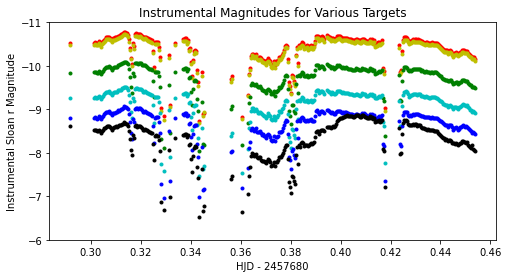

In [170]:
'''print(obsDate)
print(offset)
print(rMag_xxCyg_inst)'''

plt.figure(figsize=(8,4))
ax = plt.subplot()
offset = 2457680 # HJD to subtract for display purposes
plt.plot(obsDate-offset, rMag_cals_inst[:,0],'r.')
plt.plot(obsDate-offset, rMag_cals_inst[:,1],'y.')
plt.plot(obsDate-offset, rMag_cals_inst[:,2],'g.')
plt.plot(obsDate-offset, rMag_cals_inst[:,3],'c.')
plt.plot(obsDate-offset, rMag_cals_inst[:,4],'b.')
plt.plot(obsDate-offset, rMag_xxCyg_inst,'k.')

plt.title('Instrumental Magnitudes for Various Targets')
plt.xlabel('HJD - '+str(offset))
plt.ylabel('Instrumental Sloan r Magnitude')

ax.invert_yaxis() # Small mag = bright star
ax.set_ylim(-6,-11) # Show subset of data.


plt.savefig('UncalibratedStars.png')

In [137]:
targetData[0:7]

StarID,RA,Dec,B_simbad,V_simbad,Sloan_g,gerr,Sloan_r,r_err,Sloan_i,i_err
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BD+58 2037,300.7029583333334,59.009939444859825,11.34,10.24,11.039,0.419,9.936,-0.0,9.627,-0.0
BD+58 2043,300.95501,59.04530499988131,11.28,10.23,10.984,0.404,9.932,-0.0,9.659,-0.0
TYC 3948-2542-1,300.89915333333335,58.922608333163794,11.14,10.58,10.983,0.429,10.406,0.024,10.307,0.043
TYC 3948-2018-1,301.0171500000001,59.00512777752346,13.44,11.63,12.517,-0.0,11.319,0.038,10.767,0.012
TYC 3948-2230-1,301.0225458333333,58.914324999915216,12.31,11.46,11.954,-0.0,11.511,0.016,11.343,0.034
XX Cyg,300.8151983749999,58.95458783308665,11.99,11.86,11.929,0.426,11.447,0.136,11.433,0.194


In [138]:
cals = [0,1,2,3,4]

#compute mean of all calibrators within an image
#print(targetData['Sloan_i'])

delta_rMag = targetData['Sloan_i'][cals] - rMag_cals_inst[10]

#compute mean over all images
rMagOffset = np.nanmean(delta_rMag)

print('The average literature - instrumental magnitude offset is',rMagOffset)

The average literature - instrumental magnitude offset is 20.170992011769364


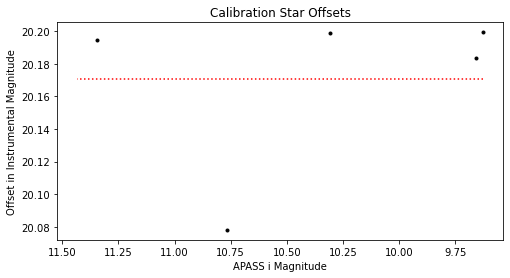

In [171]:
plt.figure(figsize=(8,4))
ax = plt.subplot()

plt.plot(targetData['Sloan_i'][cals], delta_rMag, 'k.')

# Plot a line showing the average value.
xrange = [np.nanmin(targetData['Sloan_i']), np.nanmax(targetData['Sloan_i'])]
plt.plot(xrange,[rMagOffset,rMagOffset],'r:')

plt.xlabel('APASS i Magnitude')
plt.ylabel('Offset in Instrumental Magnitude')
plt.title('Calibration Star Offsets')
ax.invert_xaxis() # Small mag = bright star

plt.savefig('AverageCalibrationValue.png')

xxcyg 310
cals 310
obs 310


/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33354/3243980862.py:31: RuntimeWarning: invalid value encountered in add
  plt.plot(obsDate-offset, rMag_cals_inst[:,2]+rMagOffset2,'g.')
/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33354/3243980862.py:39: RuntimeWarning: invalid value encountered in add
  plt.plot(obsDate-offset, rMag_cals_inst[:,4]+rMagOffset2,'b.')


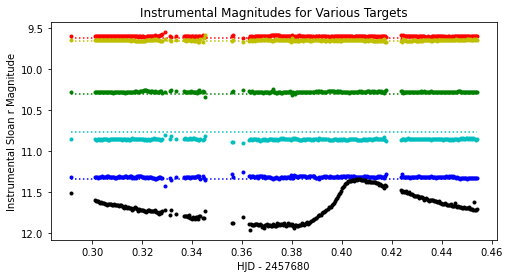

In [172]:
cals = [0,1,2,3,4]
rMagOffset2 = []
print("xxcyg", len(rMag_xxCyg_inst))
print("cals", len(rMag_cals_inst[:,0]))
print("obs", len(obsDate-offset))


for i in range(len(al_files)):
    delta_rMag2 = targetData['Sloan_i'][cals] - rMag_cals_inst[i]
    rMagOffset2.append(np.nanmean(delta_rMag2))

rMagOffset2 = np.array(rMagOffset2)

xxcyg = np.zeros_like(rMag_xxCyg_inst)
for j in range(len(rMagOffset2)):
    xxcyg[j] = rMag_xxCyg_inst[j]+rMagOffset2[j]


plt.figure(figsize=(8,4))
ax = plt.subplot()
offset = 2457680 # HJD to subtract for display purposes

plt.plot(obsDate-offset, rMag_cals_inst[:,0]+rMagOffset2,'r.')
mag_0 = np.ones_like(obsDate)*targetData['Sloan_i'][0]
plt.plot(obsDate-offset,mag_0, 'r:')

plt.plot(obsDate-offset, rMag_cals_inst[:,1]+rMagOffset2,'y.')
mag_1 = np.ones_like(obsDate)*targetData['Sloan_i'][1]
plt.plot(obsDate-offset,mag_1, 'y:')

plt.plot(obsDate-offset, rMag_cals_inst[:,2]+rMagOffset2,'g.')
mag_2 = np.ones_like(obsDate)*targetData['Sloan_i'][2]
plt.plot(obsDate-offset,mag_2, 'g:')

plt.plot(obsDate-offset, rMag_cals_inst[:,3]+rMagOffset2,'c.')
mag_3 = np.ones_like(obsDate)*targetData['Sloan_i'][3]
plt.plot(obsDate-offset,mag_3, 'c:')

plt.plot(obsDate-offset, rMag_cals_inst[:,4]+rMagOffset2,'b.')
mag_4 = np.ones_like(obsDate)*targetData['Sloan_i'][4]
plt.plot(obsDate-offset,mag_4, 'b:')


plt.plot(obsDate-offset, xxcyg,'k.')

plt.title('Instrumental Magnitudes for Various Targets')
plt.xlabel('HJD - '+str(offset))
plt.ylabel('Instrumental Sloan r Magnitude')

ax.invert_yaxis() # Small mag = bright star    

plt.savefig('CalibratedMagnitude.png')

In [141]:
EPADU = 1.3
#electrons needed to get 1 count for the camera

In [142]:
AREA = targetApertures.area

In [143]:
NSKY = skyApertures.area

In [144]:
MERR_xxcyg = []
FLUX_xxcyg2 = np.array(FLUX_xxcyg)
for k in range(len(al_files)):
    ERR = 0
    MERR = 0
    FLUX_xxcyg2[k] = FLUX_xxcyg[k]/expTime
    part1 = np.array((FLUX_xxcyg[k]*EPADU))
    part2 = np.array(AREA*(1+(AREA/NSKY))*(STDEV[k]**2))
    part3 = np.array(part1+part2)
    ERR = np.sqrt((FLUX_xxcyg[k]*EPADU) + AREA*(1+(AREA/NSKY))*(STDEV[k]**2))
    #MERR = 2.5/np.log(10)*ERR/(FLUX_xxcyg[k])
    MERR = (2.5*ERR)/(np.log(10)*FLUX_xxcyg[k])
    MERR_xxcyg.append(MERR[0])
print(FLUX_xxcyg[0])
'''print("ERR",ERR)
print("a",part1)    
print("b",part2)
print("c",part3)
print(np.array(STDEV[k]))'''
#MERR_xxcyg = np.array(MERR_xxcyg)
print(MERR_xxcyg[0])
for c in range(len(MERR_xxcyg)):
    if MERR_xxcyg[c] > 20.:
        MERR_xxcyg[c] = MERR_xxcyg[c-1]

    rMag_Inst     
------------------
2580.1481374466302
1.5825544890261847


/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33354/2496733347.py:13: RuntimeWarning: invalid value encountered in add
  plt.plot(obsDate-offset, rMag_cals_inst[:,2]+rMagOffset2,'g.')
/var/folders/8h/8ws563js09s7f29z208xy98w07jfzb/T/ipykernel_33354/2496733347.py:21: RuntimeWarning: invalid value encountered in add
  plt.plot(obsDate-offset, rMag_cals_inst[:,4]+rMagOffset2,'b.')


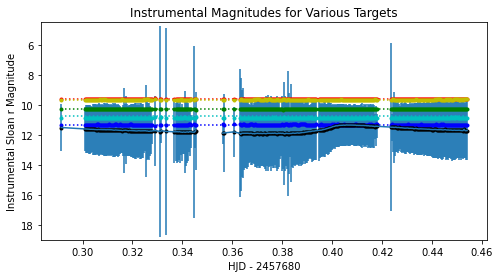

In [173]:
plt.figure(figsize=(8,4))
ax = plt.subplot()
offset = 2457680 # HJD to subtract for display purposes

plt.plot(obsDate-offset, rMag_cals_inst[:,0]+rMagOffset2,'r.')
mag_0 = np.ones_like(obsDate)*targetData['Sloan_i'][0]
plt.plot(obsDate-offset,mag_0, 'r:')

plt.plot(obsDate-offset, rMag_cals_inst[:,1]+rMagOffset2,'y.')
mag_1 = np.ones_like(obsDate)*targetData['Sloan_i'][1]
plt.plot(obsDate-offset,mag_1, 'y:')

plt.plot(obsDate-offset, rMag_cals_inst[:,2]+rMagOffset2,'g.')
mag_2 = np.ones_like(obsDate)*targetData['Sloan_i'][2]
plt.plot(obsDate-offset,mag_2, 'g:')

plt.plot(obsDate-offset, rMag_cals_inst[:,3]+rMagOffset2,'c.')
mag_3 = np.ones_like(obsDate)*targetData['Sloan_i'][3]
plt.plot(obsDate-offset,mag_3, 'c:')

plt.plot(obsDate-offset, rMag_cals_inst[:,4]+rMagOffset2,'b.')
mag_4 = np.ones_like(obsDate)*targetData['Sloan_i'][4]
plt.plot(obsDate-offset,mag_4, 'b:')


plt.plot(obsDate-offset, xxcyg,'k.')
plt.errorbar(obsDate-offset, xxcyg, yerr = MERR_xxcyg)



plt.title('Instrumental Magnitudes for Various Targets')
plt.xlabel('HJD - '+str(offset))
plt.ylabel('Instrumental Sloan r Magnitude')

plt.ylim(19,4.5) 

plt.savefig('CalibratedErrors.png')

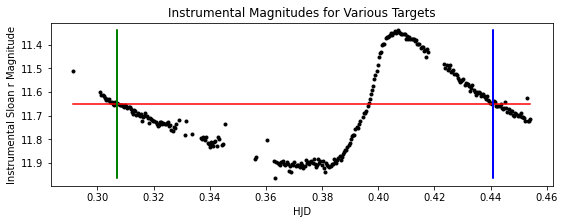

In [174]:
plt.figure(figsize=(9,3))
ax = plt.subplot()
offset = 2457680 # HJD to subtract for display purposes

plt.plot(obsDate-offset, xxcyg,'k.')

Y_value = []
X_value1 = []
X_value2 = []
rightlim = 0.441
leftlim = 0.307
for k in range(len(obsDate)):
    Y_value.append(11.65)
    X_value1.append(leftlim)
    X_value2.append(rightlim)
plt.plot(obsDate-offset,Y_value,'red')
plt.plot(X_value1,xxcyg,'green')
plt.plot(X_value2,xxcyg,'blue')

plt.title('Instrumental Magnitudes for Various Targets')
plt.xlabel('HJD')
plt.ylabel('Instrumental Sloan r Magnitude')

ax.invert_yaxis()

plt.savefig('XXCygni_Period.png')

In [147]:
PERIOD_xxcyg = rightlim-leftlim
print(PERIOD_xxcyg)

0.134


In [148]:
hours = PERIOD_xxcyg*24
print(hours,'hours')
print(int(hours//1),'hours and',int(round(hours%1,1)*60),'minutes')

3.216 hours
3 hours and 12 minutes


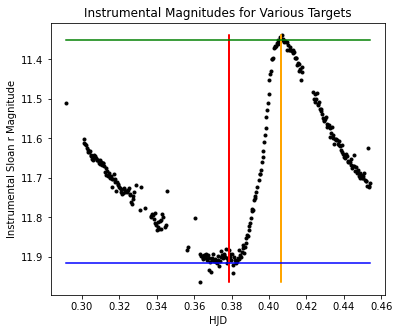

In [175]:
plt.figure(figsize=(6,5))
ax = plt.subplot()
offset = 2457680 # HJD to subtract for display purposes

plt.plot(obsDate-offset, xxcyg,'k.')

X_valueA1 = []
X_valueA2 = []
Y_valueA1 = []
Y_valueA2 = []
A_toplim = 11.35
A_bottomlim = 11.915
for l in range(len(obsDate)):
    X_valueA1.append(0.3785)
    X_valueA2.append(0.4065)
    Y_valueA1.append(A_toplim)
    Y_valueA2.append(A_bottomlim)
plt.plot(X_valueA1,xxcyg,'red')
plt.plot(X_valueA2,xxcyg,'orange')
plt.plot(obsDate-offset,Y_valueA1,'green')
plt.plot(obsDate-offset,Y_valueA2,'blue')

plt.title('Instrumental Magnitudes for Various Targets')
plt.xlabel('HJD')
plt.ylabel('Instrumental Sloan r Magnitude')

ax.invert_yaxis()

plt.savefig('XXCygni_Amplitude.png')

In [150]:
AMP_xxcyg = -A_toplim + A_bottomlim
print('Magnitude:',round(AMP_xxcyg,3))

Magnitude: 0.565
